<a href="https://colab.research.google.com/github/Tasfia-007/Classiq_qmod_paper_implementation_quantum_galton_board/blob/main/qmod_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**
Random walks serve as a fundamental model across physics, computer science, and probability theory for understanding diffusion and stochastic motion. While the **classical random walk** exhibits diffusive behavior governed by the central limit theorem, leading to a Gaussian distribution, its **quantum counterpart**—the *quantum random walk (QRW)*—introduces interference and superposition, resulting in non-Gaussian spreading patterns. This unique property enables faster propagation and forms the foundation for several quantum algorithms with proven computational advantages. Inspired by the classical *Galton Board*—a visual model of random motion—the **Quantum Galton Board (QGB)** extends the concept to the quantum domain, where a quantum walker’s evolution is dictated by quantum coin operators such as Hadamard, Gaussian, or exponential. Simulating the QGB through quantum circuits on platforms like *Qiskit* allows direct observation of quantum interference and provides an accessible means to study the transition between classical and quantum transport dynamics.

---

# **Introduction**
The random walk has long been recognized as a powerful mathematical tool to describe stochastic motion in natural and computational systems. In the **classical random walk**, a walker moves step-by-step based on probabilistic choices, resulting in diffusive motion that converges to a Gaussian distribution over time. This framework underpins numerous physical phenomena, including Brownian motion, diffusion of heat, and molecular transport.  

However, the emergence of **quantum mechanics** introduces new principles—*superposition* and *interference*—that fundamentally alter the nature of random evolution. In a **quantum random walk**, the walker’s state is represented by a complex probability amplitude rather than a simple probability, allowing different paths to interfere constructively or destructively. As a result, the quantum walker spreads quadratically faster than its classical analogue, a feature that has made quantum walks a cornerstone for designing efficient **quantum algorithms** in search, optimization, and transport simulations.  

To bridge the intuitive understanding of classical diffusion and quantum interference, the **Quantum Galton Board (QGB)** serves as a compelling visual and computational model. Analogous to the classical Galton Board, where balls cascade through pins to form a Gaussian distribution, the QGB replaces random deflections with quantum operations, revealing interference-driven probability distributions.

---

# **Background**
The **Galton Board**, or *Quincunx*, provides a classical mechanical representation of the random walk process. In this device, a ball dropped from the top encounters successive rows of pins, randomly deflecting left or right at each level, leading to a binomial distribution that approximates a Gaussian curve at the base. This illustrates the **central limit theorem** in a tangible form.  

Extending this system into the **quantum regime** gives rise to the **Quantum Galton Board**, where the motion of the particle is no longer determined by random classical choices but by a **quantum coin operator** that acts on qubits. Depending on the chosen coin—such as the **Hadamard**, **Gaussian**, or **exponential** operator—the quantum walker evolves through superposition across multiple paths simultaneously. Interference between these paths generates unique non-classical probability distributions that deviate significantly from the classical Gaussian pattern.  

Using frameworks such as **Qiskit**, these dynamics can be implemented in **quantum circuits**, where each level of the board corresponds to a quantum operation acting on a set of qubits. By comparing the results under both **ideal (noise-free)** and **noisy** quantum backends, researchers can analyze the effects of quantum coherence, decoherence, and interference on transport properties. Consequently, the **Quantum Galton Board** offers a powerful and accessible platform for exploring the boundary between **classical stochastic diffusion** and **quantum coherent evolution**.


# **Theoretical Framework and Key Equations**

---

## **1. Quantum Walk as a Universal Computational Model**

From A. M. Childs, *Phys. Rev. Lett.* **102**, 180501 (2009):

$$
U_{\text{walk}} = S \cdot (I \otimes C)
$$

In this formulation, a **quantum walk** is represented as a unitary evolution operator composed of two fundamental components:  
1. The **coin operator** \( C \), which acts on the internal two-level system (the “coin” space), creating a superposition of movement directions.  
2. The **shift operator** \( S \), which conditionally translates the position of the walker based on the coin state.  

Mathematically, \( I \) denotes the identity operator on the position space, and the tensor product \( (I \otimes C) \) applies the coin operation to all position states simultaneously. The combined evolution \( U_{\text{walk}} \) is then applied iteratively to the initial state:

$$
|\psi(t)\rangle = U_{\text{walk}}^t |\psi(0)\rangle
$$

A key theoretical result from Childs (2009) shows that any quantum circuit with \( m \) gates can be efficiently simulated by a quantum walk on an \( N \)-vertex graph such that:

$$
\log N = \mathrm{poly}(m)
$$

This relationship establishes **computational universality** of quantum walks, demonstrating that the dynamics of a properly constructed quantum walk can reproduce any quantum computation within polynomial overhead. Thus, quantum walks are not just physical analogs of random processes, but a **universal model of quantum computation**.

---

## **2. Quantum Galton Board Trajectory Scaling**

From Carney & Varcoe, *Universal Statistical Simulator*, arXiv:2202.01735 (2022):

$$
N_{\text{traj}} = 2^n, \qquad \text{Complexity} = \mathcal{O}(n^2)
$$

In the **Quantum Galton Board (QGB)**, the walker traverses a quantum circuit with \( n \) peg levels, each representing a quantum coin operation.  
For each level, the walker can be deflected **left** or **right** depending on the coin state. As the walker evolves in quantum superposition, the total number of possible trajectories scales exponentially as \( 2^n \).  

However, due to quantum parallelism, all \( 2^n \) trajectories are computed simultaneously within the quantum state space, using only **polynomial computational resources**. The resulting overall circuit complexity grows as \( \mathcal{O}(n^2) \), highlighting an intrinsic **quantum speedup** compared to classical simulations where enumerating all trajectories would require exponential time.

This scaling behavior makes the QGB a **universal statistical simulator**, capable of efficiently encoding and processing exponentially many outcomes within a compact quantum circuit.

---

## **3. Universal Statistical Simulator Principle**

In the generalized QGB model, the coin at each peg is implemented using a **rotation gate** around the x-axis:

$$
R_x(\theta_i) = e^{-i \frac{\theta_i}{2} \sigma_x}
$$

By adjusting the rotation angle \( \theta_i \) at each peg, the probability bias of the walker’s deflection can be finely tuned. The effective probability of moving left or right at the \( i^{th} \) level is given by:

$$
P_i(\text{left}) = \cos^2\left(\frac{\theta_i}{2}\right), \quad
P_i(\text{right}) = \sin^2\left(\frac{\theta_i}{2}\right)
$$

These relations show that the bias of the “quantum coin toss” is not fixed but **programmable**, enabling the circuit to **emulate arbitrary statistical distributions** by proper choice of \(\theta_i\).  

Thus, the Universal Statistical Simulator concept extends the QGB beyond a simple random walk analogy—it becomes a framework capable of **generating any desired probability distribution** through controlled interference among quantum amplitudes.

---

## **4. Quantum Walk Probability Amplitude Evolution**

From Venegas-Andraca, *Quantum Inf. Process.* **11**, 1015–1106 (2012):

$$
|\psi(t)\rangle = U_{\text{walk}}^t |\psi(0)\rangle, \quad
U_{\text{walk}} = S (I \otimes C)
$$

At each discrete time step \(t\), the walker’s state evolves according to the unitary operator \(U_{\text{walk}}\). The resulting **probability distribution** of finding the walker at position \(x\) is given by:

$$
P(x, t) = |\langle x | \psi(t) \rangle|^2
$$

In a **classical random walk**, the variance of the distribution grows linearly with time (\(\sigma^2 \propto t\)), representing diffusive spreading.  
In contrast, in a **quantum random walk**, the presence of interference leads to **ballistic spreading**, where:

$$
\sigma^2 \propto t^2
$$

This quadratic scaling in variance represents a fundamental departure from classical diffusion. It explains why quantum walks—and by extension, the Quantum Galton Board—can achieve **faster propagation of information** and are central to **quantum speedup** in algorithmic contexts such as search and transport problems.

---

## **5. Quantum Coin Operators in the Quantum Galton Board**

Two commonly used coin operators in the QGB are:

### **(a) Hadamard Coin**
$$
C_H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

The **Hadamard coin** creates an equal superposition of the left and right directions, leading to an *unbiased* quantum walk. Each step generates an interference pattern that produces symmetric but non-Gaussian spreading of probability amplitudes.

### **(b) Rotation (Biased) Coin**
$$
C_R(\theta) =
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -i \sin\left(\frac{\theta}{2}\right) \\
-i \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{bmatrix}
$$

This **rotation coin** introduces a controllable bias through the parameter \( \theta \).  
When \( \theta = \pi/2 \), it reproduces the Hadamard-like balanced case; smaller or larger values of \( \theta \) shift the walker’s distribution preferentially toward one direction.  

Hence, the choice of coin operator determines the **interference structure** of the resulting probability distribution, enabling the modeling of **Gaussian, exponential, or other customized patterns** in the Quantum Galton Board.  

Together, these coin operations serve as the fundamental control mechanisms of the QGB, shaping how quantum amplitudes evolve, interfere, and ultimately define the output statistics.

---


# **4. Quantum Circuit Design for Simulating the Quantum Galton Board (QGB)**

## **4.1 Overview**
The **Quantum Galton Board (QGB)** can be simulated using a quantum circuit that models the stochastic ball-peg dynamics of the classical Galton Board through a sequence of quantum gates.  
This circuit demonstrates **exponential computational speedup**, efficiently evaluating \( 2^n \) possible trajectories with an overall gate complexity of \( \mathcal{O}(n^2) \).  
The design employs a combination of **Hadamard**, **X**, **controlled-SWAP (CSWAP)**, and **CNOT** gates, as well as **mid-circuit resets**, to construct modular “quantum peg” units that represent each deflection point.

---

## **4.2 Basic Circuit Structure**
The basic QGB circuit operates as follows:

1. **Initialization:**  
   All qubits are initialized to the ground state \(|0\rangle\). The middle qubit is inverted using an **X gate**, representing the initial “ball” position.

2. **Superposition Creation:**  
   A **Hadamard gate** is applied to the control qubit, creating a superposition of possible left and right trajectories.

3. **Conditional Deflection:**  
   A **controlled-SWAP gate** simulates the ball’s deflection upon hitting a peg, allowing the walker to move conditionally left or right.

4. **Stabilization:**  
   An **inverted CNOT gate** stabilizes the control qubit, preventing decoherence during the deflection sequence.

5. **Equal Probability Output:**  
   A final **SWAP gate** produces an output state with equal probability (50–50) distribution across the two possible paths.

This circuit serves as the fundamental building block for higher-level quantum Galton Board simulations.

---

## **4.3 Scaling to an \(n\)-Level Quantum Galton Board**
To simulate a full \(n\)-level Galton Board, the basic peg module is **replicated \(n\) times**.  
Each level includes **mid-circuit resets** and **CNOT gates** to rebalance and maintain probability normalization between levels.

- **Qubit Requirement:** \( 2n \) total qubits — \( n \) active (working) qubits and \( n \) ancilla qubits.  
- **Gate Complexity:** Up to \( 2n^2 + 5n + 2 \).  
- **Measurement Output:** The circuit yields a single `'1'` bit at the output, which requires **post-processing** to reconstruct the corresponding **binomial probability distribution** at the base of the board.

This modular replication mirrors the structure of the physical Galton Board, with each quantum peg corresponding to a distinct computational layer within the circuit.

---

## **4.4 Biased Quantum Galton Boards**
To introduce **directional bias**, Hadamard gates are replaced with **rotation gates** \( R_x(\theta) \), enabling tunable deflection probabilities.  
For example, a **75% left** vs **25% right** bias can be achieved with a rotation angle:

$$
\theta = \frac{2\pi}{3}
$$

Bias control is implemented **per peg**, using iterative peg modules coupled with **mid-circuit resets** and **corrective CNOT gates** to maintain coherence and ensure proper probability weighting.

- **Approximate Gate Count:** \( 3n^2 + 3n + 1 \)

The inclusion of tunable biases transforms the QGB into a **universal statistical simulator**, capable of generating arbitrary asymmetric distributions through controlled quantum interference.

---

## **4.5 Use Case and Applications**
The quantum circuit for the QGB provides a powerful simulation platform for **statistical and probabilistic modeling**.  
By tuning the bias angles and peg configurations, one can emulate **Hadamard-type symmetric**, **Gaussian**, or other customized statistical distributions.  
Such circuits have potential applications in **Monte Carlo simulations**, **probabilistic sampling**, and **quantum-enhanced modeling** of diffusion and transport processes.

---


In [2]:
!pip install classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.9/598.9 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.25.0
    Uninstalling zstandard-0.25.0:
      Successfully uninstalled zstandard-0.25.0
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: keyring
    Found existing installation: keyring 25.6.0
    Uninstalling keyring-25.6.0:
      Successfully uninstalled keyring-25.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [3]:
from classiq import *
import numpy as np

In [2]:
pip install cuda-quantum


  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [23]:
from classiq import *
import numpy as np
from dataclasses import dataclass

# Define CustomBias as a classical struct
@dataclass
class CustomBias:
    addCustomBias: bool
    bias_angle: float


# CSWAP gate implementation
@qfunc
def CSWAP(ctrl: QBit, a: QBit, b: QBit):
    control(ctrl, lambda: SWAP(a, b))


# Apply peg interaction
@qfunc
def apply_peg_interaction(
    control_qubit: QBit,
    left_channel: QBit,
    peg: QBit,
    right_channel: QBit
):
    CSWAP(control_qubit, left_channel, peg)
    CX(peg, control_qubit)
    CSWAP(control_qubit, peg, right_channel)


# Process single peg interaction with optional CX
@qfunc
def process_single_peg(
    i: CInt,
    layer: CInt,
    n_layers: CInt,
    control_qubit: QBit,
    bin_qubits: QArray[QBit],
    ancilla_qubits: QArray[QBit]
):
    apply_peg_interaction(
        control_qubit,
        bin_qubits[i],
        ancilla_qubits[(n_layers - layer - 1) + i],
        bin_qubits[i + 1]
    )
    # Use classical if to conditionally apply CX
    # We can't use i < layer inside repeat, so we pass this as a function
    if_(i < layer, lambda: CX(bin_qubits[i + 1], control_qubit))


# Process layer with reset (for classical behavior)
@qfunc
def process_layer_with_reset(
    layer: CInt,
    n_layers: CInt,
    control_qubit: QBit,
    bin_qubits: QArray[QBit],
    ancilla_qubits: QArray[QBit],
    bias: CustomBias
):
    # Apply custom bias (replaces reset + bias logic)
    if_(bias.addCustomBias,
        lambda: RX(bias.bias_angle, control_qubit),
        lambda: H(control_qubit)
    )

    # Repeat loop for layer interactions
    repeat(
        count=layer + 1,
        iteration=lambda i: process_single_peg(
            i, layer, n_layers, control_qubit, bin_qubits, ancilla_qubits
        )
    )


# Process layer without reset (for quantum behavior)
@qfunc
def process_layer_without_reset(
    layer: CInt,
    n_layers: CInt,
    control_qubit: QBit,
    bin_qubits: QArray[QBit],
    ancilla_qubits: QArray[QBit],
    bias: CustomBias
):
    # Apply custom bias
    if_(bias.addCustomBias,
        lambda: RX(bias.bias_angle, control_qubit),
        lambda: H(control_qubit)
    )

    # Repeat loop for layer interactions
    repeat(
        count=layer + 1,
        iteration=lambda i: process_single_peg(
            i, layer, n_layers, control_qubit, bin_qubits, ancilla_qubits
        )
    )


# Main quantum Galton board function
@qfunc
def quantum_galton_board(
    n_layers: CInt,
    control_qubit: QBit,
    bin_qubits: QArray[QBit],
    ancilla_qubits: QArray[QBit],
    classical: bool,
    bias: CustomBias
):
    # Initialize the ball at the top (center position)
    X(bin_qubits[0])

    # Process each layer
    if_(
        classical,
        lambda: repeat(
            count=n_layers,
            iteration=lambda layer: process_layer_with_reset(
                layer, n_layers, control_qubit, bin_qubits, ancilla_qubits, bias
            )
        ),
        lambda: repeat(
            count=n_layers,
            iteration=lambda layer: process_layer_without_reset(
                layer, n_layers, control_qubit, bin_qubits, ancilla_qubits, bias
            )
        )
    )


# Main function
@qfunc
def main(bins: Output[QArray[QBit]]):
    # Allocate qubits directly
    control_qubit = QArray("control_qubit")
    ancilla_qubits = QArray("ancilla_qubits")

    allocate(1, control_qubit)
    allocate(4, ancilla_qubits)
    allocate(5, bins)

    # Run quantum Galton board
    # n_layers=4, classical=True, bias with addCustomBias=False
    quantum_galton_board(
        4,
        control_qubit[0],  # Pass first qubit from array
        bins,
        ancilla_qubits,
        True,
        CustomBias(addCustomBias=False, bias_angle=float(np.pi / 3))
    )


# Create and synthesize the quantum program
qmod = create_model(main)
qprog = synthesize(qmod)

# Display the circuit
show(qprog)

# To execute (uncomment when ready)
job = execute(qprog)
results = job.result()[0].value
print(results.parsed_counts)

/usr/local/lib/python3.12/dist-packages/classiq/synthesis.py:60: ClassiqDeprecationWarning: The computation sequence of the local variables 'control_qubit' and 'ancilla_qubits' includes a non-permutation operation
		at file ipython-input-304298883.py line 146 character 4 in function 'main'
  quantum_program.raise_warnings()


Quantum program link: https://platform.classiq.io/circuit/35I4WSgVLVPk9NVHqqST0IOpdKV
[{'bins': [0, 0, 0, 0, 0]}: 642, {'bins': [0, 1, 0, 0, 0]}: 530, {'bins': [0, 0, 1, 0, 0]}: 523, {'bins': [0, 0, 0, 1, 0]}: 122, {'bins': [0, 0, 0, 0, 1]}: 116, {'bins': [1, 0, 0, 0, 0]}: 115]


In [25]:
print(qprog)

{
  "outputs": {
    "qasm": "// Generated by Classiq.\n// Classiq version: 0.97.1\n// Creation timestamp: 2025-11-10T14:18:01.620747+00:00\n// Random seed: 2530692339\n\nOPENQASM 2.0;\ninclude \"qelib1.inc\";\ngate cswap_expanded___0_expanded___0_expanded___0 q0,q1,q2 {\n  cswap q0,q1,q2;\n}\n\ngate apply_peg_interaction_expanded___0_expanded___0_expanded___0 q0,q1,q2,q3 {\n  cswap_expanded___0_expanded___0_expanded___0 q0,q1,q2;\n  cx q2,q0;\n  cswap_expanded___0_expanded___0_expanded___0 q0,q2,q3;\n}\n\ngate process_single_peg_expanded___0_expanded___0_expanded___0 q0,q1,q2,q3,q4,q5,q6,q7,q8,q9 {\n  apply_peg_interaction_expanded___0_expanded___0_expanded___0 q0,q1,q9,q2;\n}\n\ngate process_layer_with_reset_expanded___0_expanded___0_expanded___0 q0,q1,q2,q3,q4,q5,q6,q7,q8,q9 {\n  h q0;\n  process_single_peg_expanded___0_expanded___0_expanded___0 q0,q1,q2,q3,q4,q5,q6,q7,q8,q9;\n}\n\ngate process_single_peg_expanded___0_expanded___1_expanded___0 q0,q1,q2,q3,q4,q5,q6,q7,q8,q9 {\n  appl

CIRCUIT INFO:
Circuit depth: 265

EXECUTING QUANTUM CIRCUIT...

MEASUREMENT RESULTS:
Type: <class 'list'>
[{'bins': [0, 0, 0, 0, 0]}: 644, {'bins': [0, 0, 1, 0, 0]}: 534, {'bins': [0, 1, 0, 0, 0]}: 500, {'bins': [0, 0, 0, 0, 1]}: 135, {'bins': [1, 0, 0, 0, 0]}: 125, {'bins': [0, 0, 0, 1, 0]}: 110]

Counts dictionary: {'01000': 110, '00001': 125, '10000': 135, '00100': 534, '00010': 500, '00000': 644}


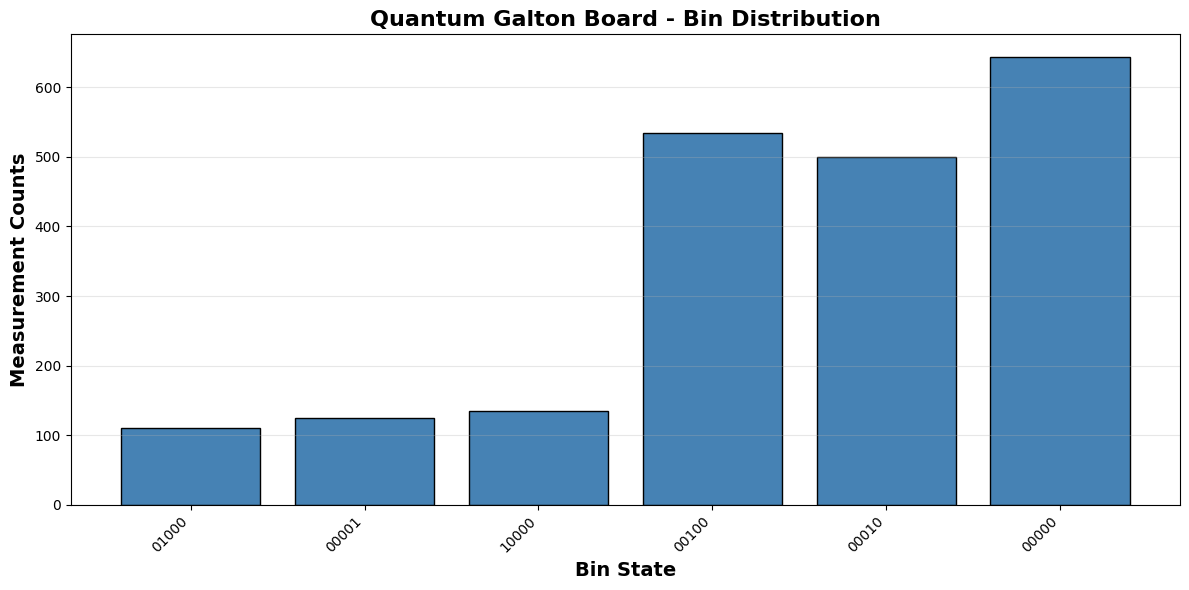


DONE!


In [29]:
from classiq import *
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

# ... your existing code ...

# Create and synthesize
qmod = create_model(main)
qprog = synthesize(qmod)

print("=" * 50)
print("CIRCUIT INFO:")
print("=" * 50)
print(f"Circuit depth: {qprog.transpiled_circuit.depth}")

# Execute
print("\n" + "=" * 50)
print("EXECUTING QUANTUM CIRCUIT...")
print("=" * 50)

job = execute(qprog)
results = job.result()[0].value

# Print results
print("\nMEASUREMENT RESULTS:")
print(f"Type: {type(results.parsed_counts)}")
print(results.parsed_counts)

# Use counts instead of parsed_counts for dictionary
counts_dict = results.counts  # This is the dictionary
print(f"\nCounts dictionary: {counts_dict}")

# Visualization
states = list(counts_dict.keys())
values = list(counts_dict.values())

plt.figure(figsize=(12, 6))
plt.bar(states, values, color='steelblue', edgecolor='black')
plt.xlabel('Bin State', fontsize=14, fontweight='bold')
plt.ylabel('Measurement Counts', fontsize=14, fontweight='bold')
plt.title('Quantum Galton Board - Bin Distribution', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("DONE!")
print("=" * 50)

In [18]:
import classiq

# Authenticate with Classiq
classiq.authenticate()

If a browser doesn't automatically open, please visit this URL from any trusted device to authenticate: https://auth.classiq.io/authorize?client_id=f6721qMOVoDAOVkzrv8YaWassRKSFX6Y&response_type=code&audience=https%3A%2F%2Fcadmium-be&redirect_uri=https%3A%2F%2Fauth.classiq.io%2Factivate%3Fuser_code%3DWVWX-WDQH&scope=offline_access
Your user code: WVWX-WDQH


NotImplementedError: 

In [13]:
!pip install classiq
!classiq-app --jupyter

/bin/bash: line 1: classiq-app: command not found
